In [1]:
! nvidia-smi

Fri Sep 19 14:32:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import zipfile
import os

# Path to your dataset zip
zip_path = "/content/project2.v1i.yolov12.zip"
extract_path = "/content/dataset"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: /content/dataset


In [3]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.4 MB/s eta 0:00:00


In [4]:
import yaml

# Path to your YAML
yaml_path = "/content/dataset/data.yaml"

# Open and read
with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print(data)             # full content
print(data['names'])    # class names
print(data['nc'])       # number of classes
print(data['train'])    # training path

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 6, 'names': ['bird-drop', 'clean', 'dusty', 'electrical-damage', 'physical-damage', 'snow-covered'], 'roboflow': {'workspace': 'solarpanel-ncg6j', 'project': 'project2-9vhrk', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/solarpanel-ncg6j/project2-9vhrk/dataset/1'}}
['bird-drop', 'clean', 'dusty', 'electrical-damage', 'physical-damage', 'snow-covered']
6
../train/images


In [6]:
from ultralytics import YOLO

# Load a pretrained YOLOv12m model
# Either use "yolo12m.pt" if you downloaded the checkpoint, or specify model name.
model = YOLO("yolo12m.pt")
# Alternatively:
# model = YOLO("yolo12m")  # it should auto-download

# Train on your custom dataset
# data_yaml should point to your dataset's YAML defining train/val paths, class names etc.
model.train(
    data="/content/dataset/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    device=0,          # GPU, or "cpu"
    name="yolo12m_custom",
    project="runs/train"  # where results are saved
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo12m_custom2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dac698c5b80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [7]:
!yolo detect predict model=/content/runs/train/yolo12m_custom2/weights/best.pt source=/content/dataset/valid/images

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 169 layers, 20,109,538 parameters, 0 gradients, 67.1 GFLOPs

image 1/15 /content/dataset/valid/images/Bird-31-_JPG.rf.380f22e6b54687ab9f5d9295986e4990.jpg: 640x640 2 bird-drops, 2 electrical-damages, 43.3ms
image 2/15 /content/dataset/valid/images/Clean-129-_jpg.rf.9bbbd836d843434078c9b3ca1a0217ad.jpg: 640x640 1 clean, 1 snow-covered, 40.7ms
image 3/15 /content/dataset/valid/images/Clean-130-_jpg.rf.4d043d0f59256fd8371b685a327c0deb.jpg: 640x640 1 clean, 40.7ms
image 4/15 /content/dataset/valid/images/Dust-125-_jpg.rf.15df4685be37fd3ceadc400d8a041885.jpg: 640x640 1 dusty, 40.7ms
image 5/15 /content/dataset/valid/images/Dust-81-_jpg.rf.050b71702a9aaa98d6c20f582501e92e.jpg: 640x640 1 clean, 40.7ms
image 6/15 /content/dataset/valid/images/Electrical-27-_jpg.rf.8b12b20fd9adfa9377f2789947f503af.jpg: 640x640 1 electrical-damage, 29.4ms
image 7/15 /content/dataset/valid/images/Electrica

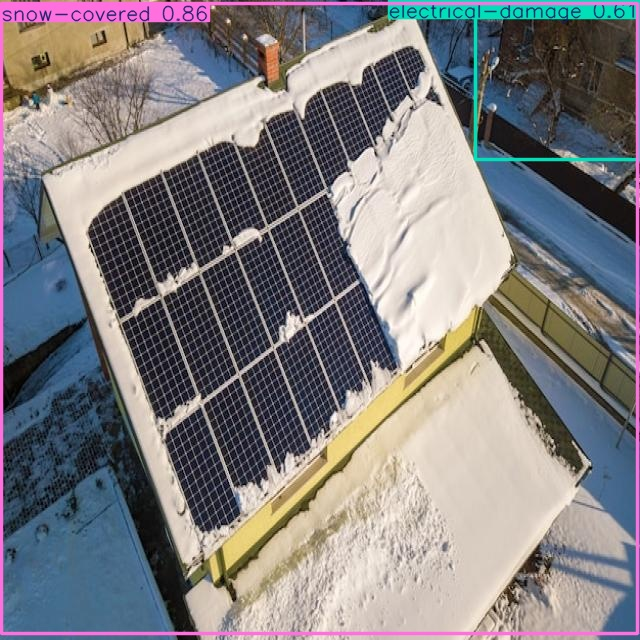

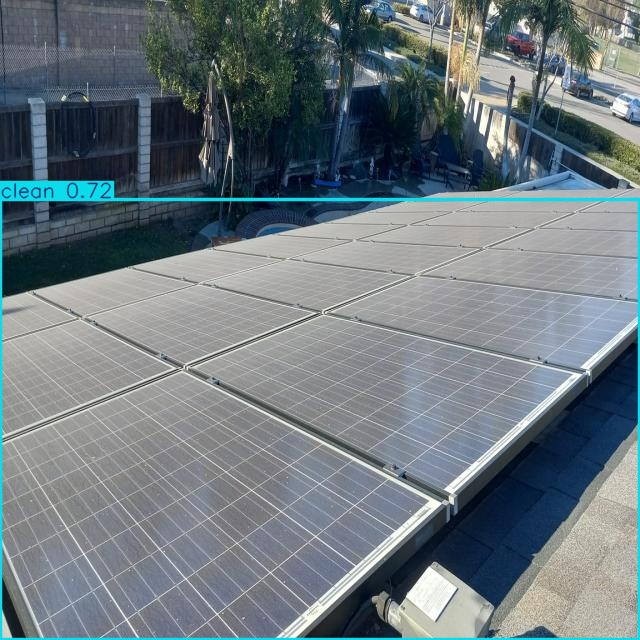

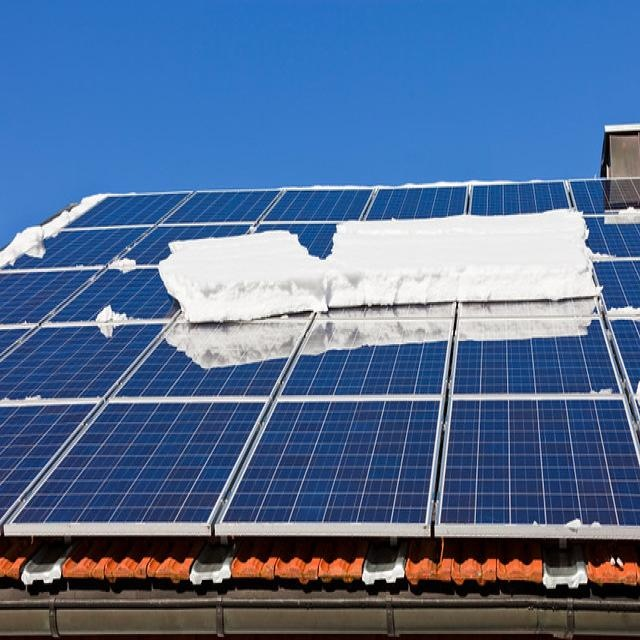

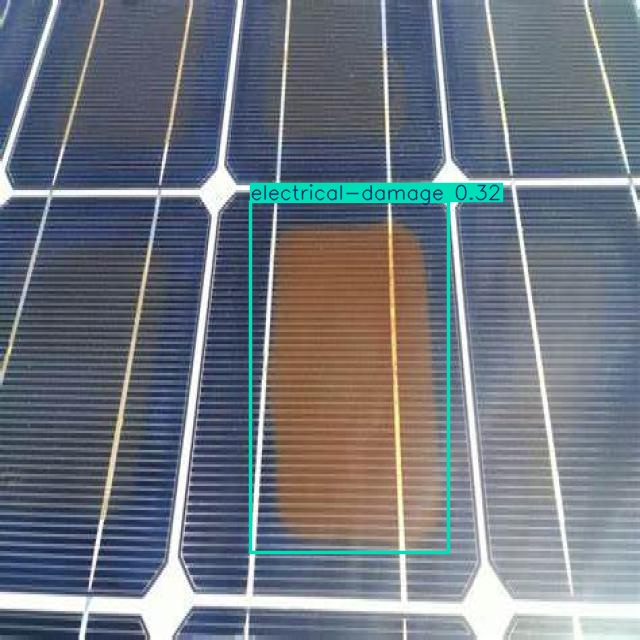

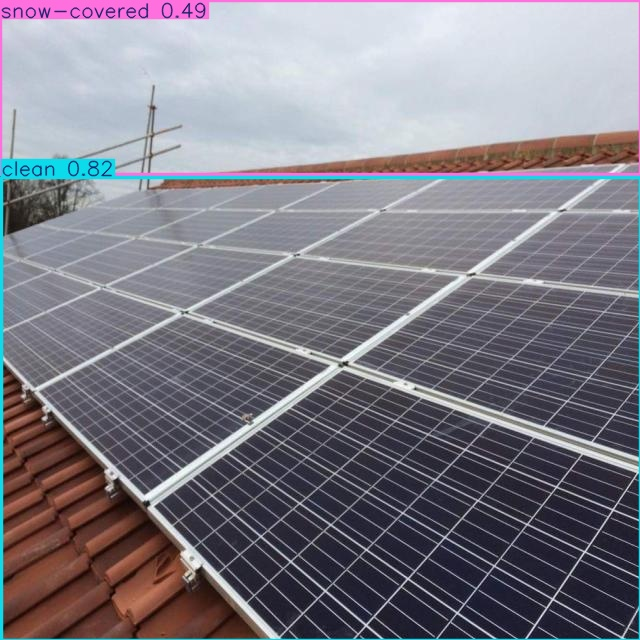

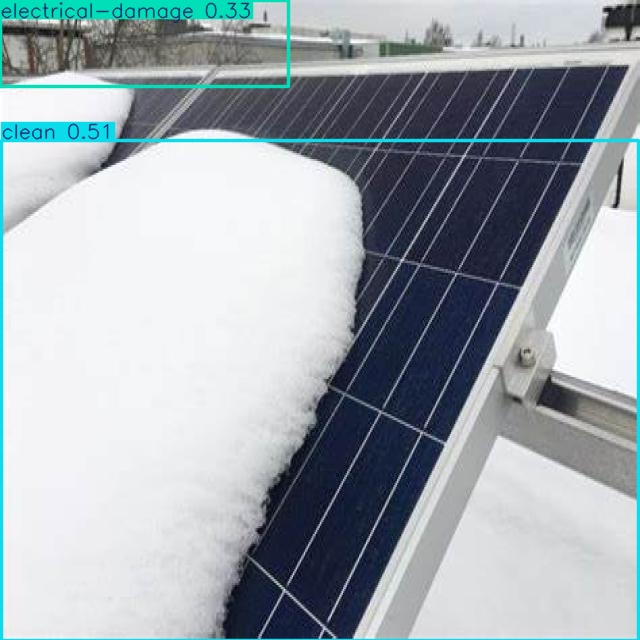

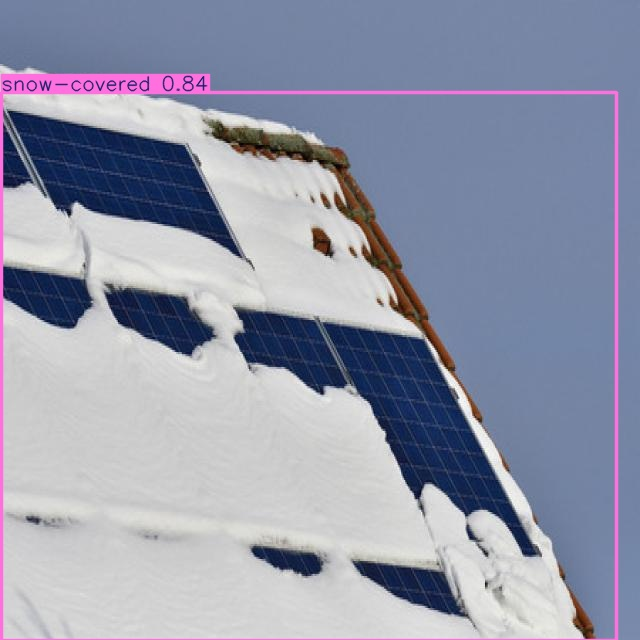

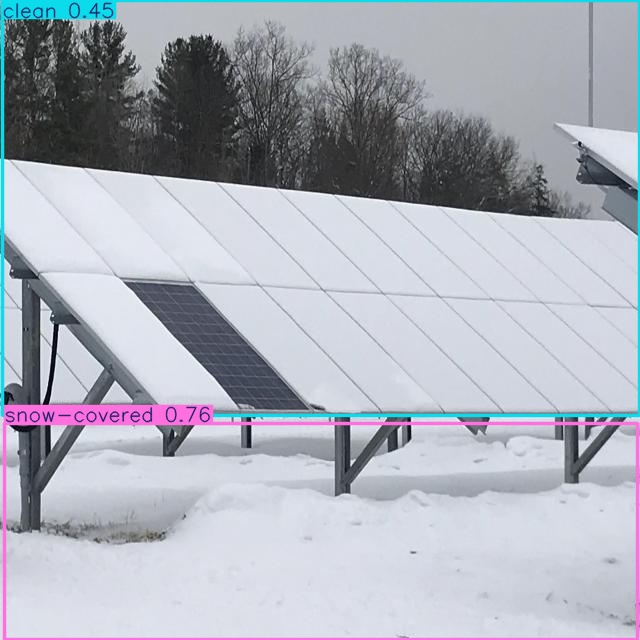

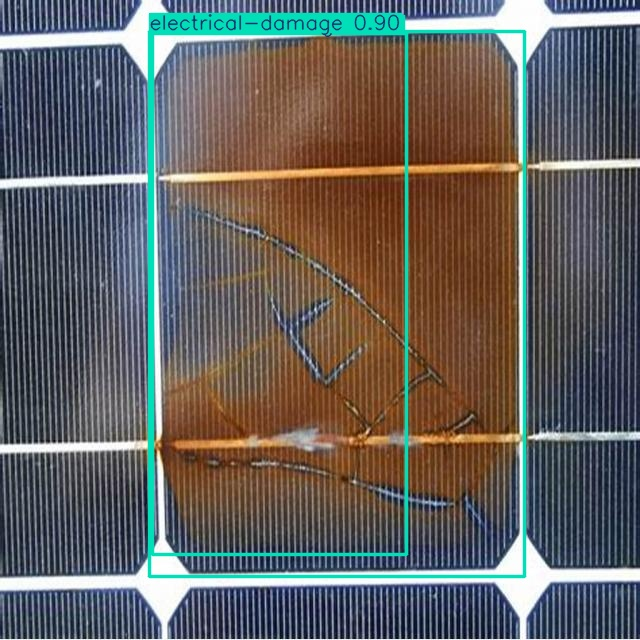

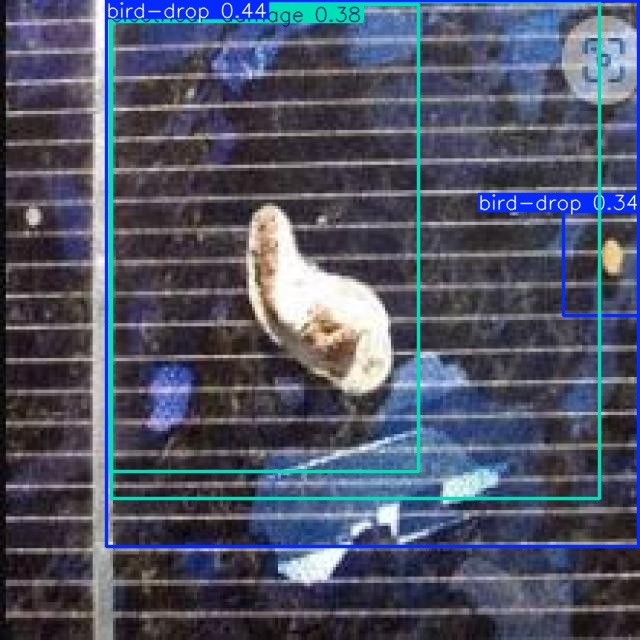

In [8]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [10]:
!mkdir /content/my_model
!cp /content/runs/train/yolo12m_custom2/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

mkdir: cannot create directory ‘/content/my_model’: File exists
/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/yolo12m_custom/ (stored 0%)
  adding: train/yolo12m_custom/weights/ (stored 0%)
  adding: train/yolo12m_custom/args.yaml (deflated 52%)
  adding: train/yolo12m_custom2/ (stored 0%)
  adding: train/yolo12m_custom2/train_batch722.jpg (deflated 4%)
  adding: train/yolo12m_custom2/confusion_matrix.png (deflated 24%)
  adding: train/yolo12m_custom2/train_batch0.jpg (deflated 1%)
  adding: train/yolo12m_custom2/train_batch2.jpg (deflated 1%)
  adding: train/yolo12m_custom2/labels.jpg (deflated 39%)
  adding: train/yolo12m_custom2/train_batch1.jpg (deflated 3%)
  adding: train/yolo12m_custom2/weights/ (stored 0%)
  adding: train/yolo12m_custom2/weights/best.pt (deflated 8%)
  adding: train/yolo12m_custom2/weights/last.pt (deflated 8%)
  adding: train/yolo12m_custom2/train_batch721.jpg (deflated 4%)
  adding: train/yolo12m_custom2/co

In [12]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>